# **Introduction to Convolutional Neural Networks**

### [Matteo De Matola](https://github.com/matteo-d-m) 

Convolutional neural networks (CNNs) are a class of artificial neural networks that are widely used across several domains.

In the last ten years, they have been increasingly used in neuroscience as:
- Models of the ventral visual stream 
- EEG classifiers
- MRI classifiers 
- EEG forecasters
- & more

At [CoN&Co](https://www.cimec.unitn.it/en/CoNeCo), we are using CNNs as EEG classifiers (and we might  use them as EEG forecasters).

Due to their increasing popularity in neuroscientific research, it is increasingly important to understand what CNNs are and how to implement them. 

This notebook cannot provide a throrough treatment of CNNs' theory and applications, nor can it be mathematically rigorous. But it will:
- Provide all the basic definitions 
- Introduce all the essential Python tools
- Build a working CNN for object recognition, step-by-step
- Provide pointers to external resources (e.g., papers, books, and online courses) to deepen your understanding of CNN theory

Some of the material in this notebook was taught by me (Matteo De Matola) in Lecture 3.3 of Luigi Petrucco's course, [Python for (open) Neuroscience](https://github.com/vigji/python-cimec-2024) (2024 iteration).

# **Table of Contents** <a class="anchor" id="back-to-top"></a>

[Part 1: The Concepts](#part-1-the-concepts)
- [Core Concept 1: Artificial Neural Networks](#first-concept)

    - [1.1. The Artificial Neuron](#11-the-artificial-neuron)
    
        - [1.1.1. The Activation Function](#111-the-activation-function)
    - [1.2. From Neuron to Network](#12-from-neuron-to-network)
    - [1.3. From Network to Deep Network](#13-from-network-to-deep-network)
- [Core Concept 2: From (Deep) Network to (Deep) Convolutional Network](#second-concept)
    - [2.1. The Problem of Bidimensional Inputs](#21-the-problem-of-bidimensional-inputs)
    - [2.2. Convolution Captures Local Structures](#22-convolution-captures-local-structures)
- [Core Concept 3: Error-Driven Learning](#core-concept-3-error-driven-learning)
    
    - [3.0. Weights Shape Everything](#30-weights-shape-everything)
    - [3.1. What is Error-Driven Learning?](#31-what-is-error-driven-learning)
    - [3.2. The Rules of Error-Driven Learning](#32-the-rules-of-error-driven-learning)
    - [3.3. The Prerequisites for Error-Driven Learning](#33-the-prerequisites-for-error-driven-learning)
    - [3.4. Error Backpropagation](#34-error-backpropagation)

[Part 2: The Implementation](#part-2-the-implementation)

# **Part 1: The Concepts** <a class="anchor" id="part-1-the-concepts"></a>

## **Core Concept 1: Artificial Neural Networks** <a class="anchor" id="first-concept"></a> 

As mentioned above, CNNs are a class of artificial neural networks (ANNs). 

ANNs are mathematical models of networks of interacting biological neurons. While their biological plausibility is debatable, ANNs have proven able to simulate some aspects of animal cognition, such as learning, vision, language, and executive control. 

### **1.1. The Artificial Neuron** <a class="anchor" id="11-the-artificial-neuron"></a>

The artificial neuron is the cornerstone of artificial neural networks. 

It is a mathematical model (basically, one equation) that represents a neuron as a weighted sum:

Given: 
- $ \vec{x} = [x_{1},x_{2},x_{3},...,x_{n}]  $ 
- $ \vec{w} = [w_{1},w_{2},w_{3},...,w_{n}]  $ 

Calculate: 

$ \displaystyle a = \sum_{i = 1}^{n} w_{i}x_{i} = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + ... + w_{n}x_{n} $

where

- $ \vec{x} $ = a vector that stores $ n $ input values
- $ \vec{w} $ = a vector that stores $ n $ corresponding weights
- $ a = $ the neuron's activation

This is meant 
to model three biological facts:
1. Real neurons receive **inputs** from multiple synapses
2. Different synapses have different **strengths**, therefore, the corresponding inputs have different _weights_ (i.e., importance, salience, relevance...)
3. Postsynaptic potentials (and _action_ potentials) are a **sum** of the local potentials generated by synaptic activity

An artificial neuron may have a _bias_ term ($b$) to represent its baseline activity: 

$$ a = b + \sum_{i = 1}^{n} w_{i}x_{i} = b + w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + ... + w_{n}x_{n} $$

The code below implements an artificial neuron that receives a three-dimensional (random) input. 

In linear algebra jargon, the weighted sum of inputs is the _dot product_ between vector $\vec{w}$ and vector $\vec{x}$. This is why the corresponding NumPy function is called `dot()`.

In [28]:
import numpy as np 
np.random.seed(0)

def artificial_neuron(inputs, weights, bias=0):
    activation = bias + np.dot(inputs, weights) 
    return activation

NUMBER_OF_INPUTS = 3
inputs_vector = np.random.rand(1,NUMBER_OF_INPUTS)
weights_vector = np.random.randn(NUMBER_OF_INPUTS,1)

neuronal_activation = artificial_neuron(weights=weights_vector,
                                        inputs=inputs_vector,
                                        bias=0)

print(f"This neuron's activation is: {neuronal_activation}")

This neuron's activation is: [[-0.79911487]]


#### **1.1.1. The Activation Function** <a class="anchor" id="111-the-activation-function"></a>

The computation of the neuron's activation value is usually followed by a nonlinear function that we call the _activation function_ ( $f$ ):

$$ o = f(a) $$

where

- $o$ = the neuron's output
- $a$ = the neuron's activation (weighted sum of its inputs)
- $f$ = some nonlinear function

The role of the activation function is to account (or at least, try to account) for the nonlinear nature of true neuronal activity.

The ANNs literature contains a wealth of activation functions. One classic example is the sigmoid function:

$$ \sigma = \frac{1}{(1+e^{-x})} $$

While it might look complex, the sigmoid does little more than compressing the input between 0 and 1:

Text(0.5, 1.0, 'Sigmoid function')

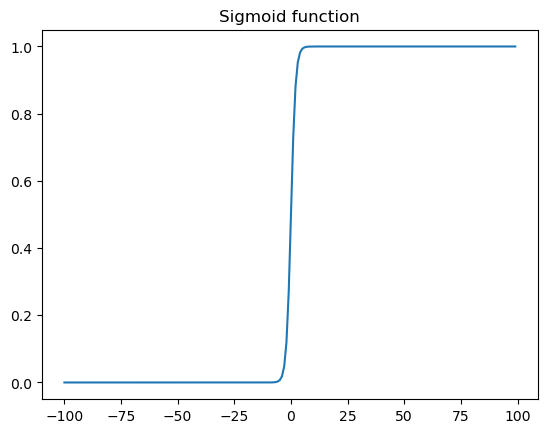

In [29]:
import matplotlib.pyplot as plt

def sigmoid(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid

input_values = np.array([n for n in range(-100,100)])
sigmoid_values = sigmoid(x=input_values)
plt.plot(input_values, sigmoid_values)
plt.title("Sigmoid function")

The sigmoid has been important in the past, but is not much used nowadays.

A more modern activation function is the rectified linear unit (ReLU), which sets all negative values to zero and leaves all non-negative values as they were:

$$
ReLU(x) = \begin{cases}
                            x \text{  if  } x \geq 0 \\ 
                            0 \text{  otherwise}
                    \end{cases}
$$

Text(0.5, 1.0, 'Rectified Linear Unit (ReLU)')

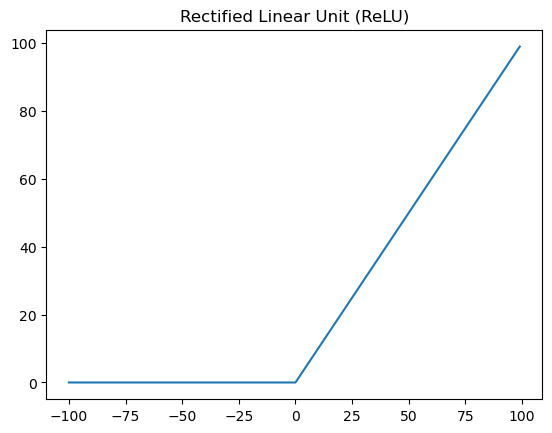

In [30]:
def relu(x):
    smaller_than_zero = (x <= 0)
    relu_values = x.copy()              # because the next line works inplace
    relu_values[smaller_than_zero] = 0    
    return relu_values

input_values = np.array([n for n in range(-100,100)])
relu_values = relu(x=input_values)
plt.plot(input_values, relu_values)
plt.title("Rectified Linear Unit (ReLU)")

If you think about it, ReLU actually picks the maximum among 0 and $ x $. Therefore, it is more compactly written as:

$$ ReLU(x) = max(0,x) $$

Text(0.5, 1.0, 'Rectified Linear Unit (ReLU) - More compact, same result')

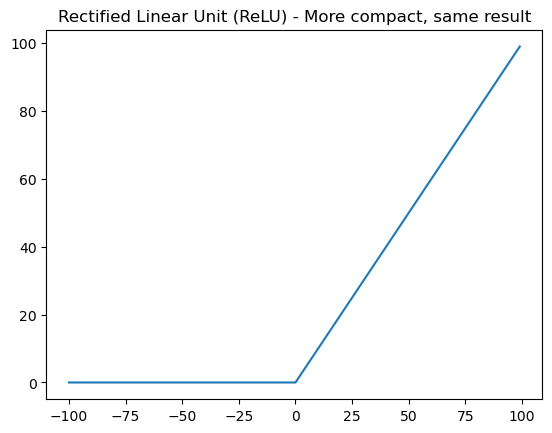

In [6]:
def relu(x):
    return np.maximum(0,x)

input_values = np.array([n for n in range(-100,100)])
relu_values = relu(x=input_values)
plt.plot(input_values, relu_values)
plt.title("Rectified Linear Unit (ReLU) - More compact, same result")

Here's the effect of sigmoid and ReLU functions on a neuron's activation:

In [7]:
with_sigmoid_activation = sigmoid(neuronal_activation)
with_relu_activation = relu(neuronal_activation)

print(f"Neuron's activation value (before any nonlinearity): {neuronal_activation} | After sigmoid: {with_sigmoid_activation}") 
print(f"Neuron's activation value (before any nonlinearity): {neuronal_activation} | After ReLU: {with_relu_activation}") 

Neuron's activation value (before any nonlinearity): [[1.43409165]] | After sigmoid: [[0.80753804]]
Neuron's activation value (before any nonlinearity): [[1.43409165]] | After ReLU: [[1.43409165]]


**Interim Summary: The Artificial Neuron in a Nutshell**

- The artificial neuron is a mathematical model of the biological neuron
- Akin to the biological neuron, it receives multiple inputs. Different inputs have different weights (a.k.a. importance, salience, relevance...)
- The artificial neuron is a weighted sum of inputs. It literally **IS** that: just basic maths!
- To account for the nonlinear behaviour of biological neurons, we feed the activations of artificial neurons into nonlinear functions

<p align="center">
  <img src="./files/artificial-neuron.png" />
</p>

### **1.2. From Neuron to Network** <a class="anchor" id="12-from-neuron-to-network"></a>

So... To model a single neuron, we multiply two vectors ($\vec{w}$ and $\vec{x}$):
- One vector contains input data ($\vec{x}$)
- One vector contains the corresponding weights ($\vec{w}$)

To model a larger set of neurons (i.e., a network), we must multiply the vector of inputs ($\vec{x}$) for a whole _matrix_ of weights ($W$). This matrix will have:

- One row for each neuron in the network
- One column for each input

This really won't change anything but the number of neurons involved.

Given:

- $ \vec{x} = [x_{1},x_{2},x_{3},...,x_{n}]  $

- $ W = \displaystyle \begin{bmatrix}
                      w_{11} & w_{12} & w_{13} & ... &  w_{1n} \\
                      w_{21} & w_{22} & w_{23} & ... &  w_{2n} \\
                      w_{31} & w_{32} & w_{33} & ... &  w_{3n} \\
                      \vdots & \vdots & \vdots & \ddots & \vdots \\
                      w_{m1} & w_{m2} & w_{m3} & ... & w_{mn} 
                      \end{bmatrix}    $  

Calculate: 

$ \vec{a} = [a_{1},a_{2},a_{3},...,a_{m}]  $

where

- $ \vec{x} = $ a vector that stores $ n $ input intensity values
- $ W = $ a matrix that stores $ n $ corresponding weights for each of $ m $ neurons
- $ \vec{a} = $ a vector that stores $ m $ activation values (one for each neuron)

Each element of $ \vec{a} $ is the dot product (weighted sum) between $ \vec{x} $ and one row of the weights matrix: 


$ \displaystyle a_{i} = \sum_{j = 1}^{n} w_{ij}x_{i} = w_{i1}x_{1} + w_{i2}x_{2} + w_{i3}x_{3} + ... + w_{in}x_{n} $ 

where 

- $ a_i = $ the activation value of the $ i^{th} $ neuron

Here's what all looks like in video:

<video width="1000" height="auto" controls>
  <source src="./files/mat-vec-mul.mp4" type="video/mp4">
</video>

And here's what it all looks like in code:

In [10]:
def artificial_neural_network(inputs, weights, bias=0):
    network_activation = bias + np.dot(inputs, weights) 
    return network_activation

NUMBER_OF_INPUTS = 3
NUMBER_OF_NEURONS = 3
some_random_inputs = np.random.rand(1,NUMBER_OF_INPUTS)
some_corresponding_weights = np.random.randn(NUMBER_OF_NEURONS,NUMBER_OF_INPUTS)

network_activation = artificial_neural_network(inputs=some_random_inputs,
                                               weights=some_corresponding_weights,
                                               bias=0)
with_sigmoid = sigmoid(network_activation)
with_relu = relu(network_activation)

print(f"Network activation (before any nonlinearity): {network_activation} | After sigmoid: {with_sigmoid}")
print(f"Network activation (before any nonlinearity): {network_activation} | After ReLU: {with_relu}")

Network activation (before any nonlinearity): [[2.61805374 0.8185998  1.64595012]] | After sigmoid: [[0.93201449 0.69393904 0.83834295]]
Network activation (before any nonlinearity): [[2.61805374 0.8185998  1.64595012]] | After ReLU: [[2.61805374 0.8185998  1.64595012]]


**Interim summary: From Neuron to Network in a Nutshell**

- An ANN is a mathematical model of a _network_ of neurons
- An ANN is composed of _multiple_ artificial neurons (so-called _nodes_) 
    - Each neuron is a weighted sum of inputs followed by a nonlinear function

### **1.3. From Network to Deep Network** <a class="anchor" id="13-from-network-to-deep-network"></a>

The multiplication between a vector of inputs and a matrix of coefficients yields the activity of a set of neurons. This set of neurons is called a _network layer_.
- Analogy: a brain area

But, what if we have _multiple_ sets of neurons that communicate with each other?
- One brain area that sends signals to another area, that sends them to another one, that sends them to another one...

To simulate this situation, we just concatenate multiple layers
- The output of a set of neurons becomes the input to another one
- Eventually, the output from the whole network will be shaped by each layer's output

Here's what it looks like in code:

In [15]:
def network_layer(inputs, weights, bias, activation_function):
    layer_activation = bias + np.dot(inputs, weights) 
    return activation_function(layer_activation)

NUMBER_OF_INPUTS = 3
NUMBER_OF_NEURONS = 3

input_vector = np.random.rand(1,NUMBER_OF_INPUTS)
first_layer_weights = np.random.randn(NUMBER_OF_NEURONS,NUMBER_OF_INPUTS)
second_layer_weights = np.random.randn(NUMBER_OF_NEURONS,NUMBER_OF_INPUTS)
third_layer_weights = np.random.randn(NUMBER_OF_NEURONS,NUMBER_OF_INPUTS)

first_layer_activation_sigmoid = network_layer(inputs=input_vector,
                                               weights=first_layer_weights,
                                               bias=0,
                                               activation_function=sigmoid)
first_layer_activation_relu = network_layer(inputs=input_vector,
                                            weights=first_layer_weights,
                                            bias=0,
                                            activation_function=relu)
print(f"Layer 1's activation - With sigmoid: {first_layer_activation_sigmoid} | With ReLU: {first_layer_activation_relu}")
print(" ")

second_layer_activation_sigmoid = network_layer(inputs=first_layer_activation_sigmoid,
                                                weights=second_layer_weights,
                                                bias=0,
                                                activation_function=sigmoid)
second_layer_activation_relu = network_layer(inputs=first_layer_activation_relu,
                                             weights=first_layer_weights,
                                             bias=0,
                                             activation_function=relu)
print(f"Layer 2's activation - With sigmoid: {second_layer_activation_sigmoid} | With ReLU: {first_layer_activation_relu}")
print(" ")

third_layer_activation_sigmoid = network_layer(inputs=second_layer_activation_sigmoid,
                                               weights=second_layer_weights,
                                               bias=0,
                                               activation_function=sigmoid)
third_layer_activation_relu = network_layer(inputs=second_layer_activation_relu,
                                            weights=first_layer_weights,
                                            bias=0,
                                            activation_function=relu)
print(f"Layer 2's activation - With sigmoid: {third_layer_activation_sigmoid} | With ReLU: {third_layer_activation_relu}")
print(" ")

Layer 1's activation - With sigmoid: [[0.45533767 0.47676576 0.62671081]] | With ReLU: [[0.         0.         0.51813179]]
 
Layer 2's activation - With sigmoid: [[0.49170153 0.14294215 0.13289908]] | With ReLU: [[0.         0.         0.51813179]]
 
Layer 2's activation - With sigmoid: [[0.55233182 0.32103982 0.24910428]] | With ReLU: [[0.82405154 2.83163878 3.56981715]]
 


**Interim summary: From Network to Deep Network in a Nutshell**

- A deep network is a chain of layers
    - Each layer's output is the input to the next
    - The output from each layer contributes to the output from the whole network

- Each layer is itself a chain of two operations:
    - Multiplication between $W$ and $\vec{x}$  
    - A nonlinear activation function ( $f$ )

[Back to top](#back-to-top)

## **Core Concept 2: From (Deep) Network to (Deep) Convolutional Network** <a class="anchor" id="second-concept"></a>

### **2.1. The Problem of Bidimensional Inputs** <a class="anchor" id="21-the-problem-of-bidimensional-inputs"></a>

As described above, a standard neural network layer consists of:

- Multiplication between $W$ (a weights matrix) and $\vec{x}$ (a vector of data) 
- A nonlinear activation function ( $f$ )

The output of such layer is $\vec{a}$, a vector of neuronal activation values (one value for each neuron in the layer). 

Such standard network layers work well for vector inputs, i.e., things like:

$$ \vec{x} = [x_{1},x_{2},x_{3},...,x_{n}]  $$

In practice, such inputs might be EEG data from a given electrode, in a given time window (one number per time point): 

$$ EEG \ (\mu V) = [0.1, 0.16, -0.1, ..., 0.24] $$

or the mean rent in [Rovereto](https://en.wikipedia.org/wiki/Rovereto) districts at any given time (one number per district):

$$ Rent \ (€) = [450, 465, 480, ..., 510] $$

or anything else that can be described by a one-dimensional array. 

But, what do we do with grid-like, two-dimensional inputs?

For example, what do we do with EEG data from several electrodes?

 $$ EEG \ (\mu V) = \begin{bmatrix}
                    0.12 & 0.16 & -0.10  & ... &  0.24 \\
                    0.17 & 0.23 & -0.21 & ... &  0.33 \\
                    1.33 & 0.97 & -0.34 & ... &  0.26 \\
                    \vdots & \vdots & \vdots & \ddots & \vdots \\
                    1.01   & 1.41 & 1.27 & ... & -2.35 
                    \end{bmatrix}    $$  

And, what do we do with an image (which is just a grid of colour - or luminance - values)?

<p align="center">
  <img src="./files/birdie.jpg" />
</p>

In principle, grid-like inputs could be multiplied by a weights matrix like their vector counterparts. 

Given:

 - $ X = \displaystyle \begin{bmatrix}
                      x_{11} & x_{12} & x_{13} & ... &  x_{1m} \\
                      x_{21} & x_{22} & x_{23} & ... &  x_{2m} \\
                      x_{31} & x_{32} & x_{33} & ... &  x_{3m} \\
                      \vdots & \vdots & \vdots & \ddots & \vdots \\
                      x_{n1} & x_{n2} & x_{n3} & ... & x_{nm} 
                      \end{bmatrix}    $ 

- $ W = \displaystyle \begin{bmatrix}
                      w_{11} & w_{12} & w_{13} & ... &  w_{1n} \\
                      w_{21} & w_{22} & w_{23} & ... &  w_{2n} \\
                      w_{31} & w_{32} & w_{33} & ... &  w_{3n} \\
                      \vdots & \vdots & \vdots & \ddots & \vdots \\
                      w_{m1} & w_{m2} & w_{m3} & ... & w_{mn} 
                      \end{bmatrix}    $ 

We would calculate: 

- $ A = \displaystyle \begin{bmatrix}
                      a_{11} & a_{12} & a_{13} & ... &  a_{1m} \\
                      a_{21} & a_{22} & a_{23} & ... &  a_{2m} \\
                      a_{31} & a_{32} & a_{33} & ... &  a_{3m} \\
                      \vdots & \vdots & \vdots & \ddots & \vdots \\
                      a_{m1} & a_{m2} & a_{m3} & ... & a_{mm} 
                      \end{bmatrix}    $  

where

- $ X = $ a matrix that stores $ n \cdot m $ intensity values of a bidimensional input
- $ W = $ a matrix that stores $ n $ corresponding weights for each of $ m $ neurons
- $ A = $ a matrix that stores $ m $ activation values for $ m $ neurons

Each element of $ A $ would be the dot product (weighted sum) between one row of $ W $ and one column of $ X $: 


$ \displaystyle a_{ij} = \sum_{j = 1}^{n} w_{ij}x_{ji} = w_{i1}x_{1j} + w_{i2}x_{2j} + w_{i3}x_{3j} + ... + w_{in}x_{nj} $ 

where 

- $ a_{ij} = $ is the response of the $ i^{th} $ neuron to the $ j^{th} $ column of the input matrix 


While feasible, this strategy is:

- Quite complex 
  - It has no straightforward interpretation   
  - If you tried it out with paper and pencil, you might have a hard time wrapping your mind around it
- Very inefficient
    - It neglects the compositional structure of inputs
      - Wait - what is this?

### **2.2. Convolution Captures Local Structures** <a class="anchor" id="22-convolution-captures-local-structures"></a>

Often, grid-like inputs are a composition of local structures, or _**features**_:

- An image is composed of edges, circles, and other geometric primitives
- An EEG is composed of different patterns of activity from different electrodes
- etc.

To capture this local structure, we can:

- Take a small weights matrix (smaller than the input) 
- Overlay this small weights matrix to an equally small patch of the input
- Multiply the small weights matrix and the small patch of input element-wise
- Sum all the element-wise products
- Repeat on a different patch until the whole input is covered

This operation is known as _**convolution**_ and is equivalent to taking the dot product between a patch of input and a set of weights.

Note that:

- Convolution returns weighted sums of inputs that are specific to a given input region, that is, that represent a specific _feature_
- We can interpret the result of convolution in terms of sensory neurons and their receptive fields

This is better explained in video:

<video width="1000" height="auto" controls>
  <source src="./files/discrete-conv.mp4" type="video/mp4">
</video>

Understanding convolution requires to know three terms and understand their meaning:

1. **Kernel:** the weights matrix. It's also called _filter_
    - These are terms we inherited from the fields of image and signal processing, where convolution is very popular

2. **Padding:** a frame of zeros around the image. If the size of your kernel is such that the kernel might end up outside the input, you must pad the input with zeros - otherwise, Python will throw an error. This has no impact on the result, as the element-wise products of kernel values and padding values will be 0 

3. **Stride:** the size of each kernel's step

Now that we know the jargon, we can implement a convolution in pure NumPy:

In [26]:
input_height, input_width = 10, 10
gridlike_input = np.random.rand(input_height,input_width)

kernel_height, kernel_width = 2, 2
convolution_kernel = np.random.randn(kernel_height,kernel_width)

padding = 0
horizontal_stride, vertical_stride = kernel_width, kernel_height

output_height = int((input_height + 2*padding - kernel_height) / vertical_stride) + 1   # law
output_width = int((input_width + 2*padding - kernel_width) / horizontal_stride) + 1    # law
feature_map = np.zeros((output_height,output_width))

width_covered, height_covered, convolution_steps  = 0, 0, 0
for row in range(output_height):
    for column in range(output_width):
        input_patch = gridlike_input[height_covered:kernel_height+height_covered,
                                     width_covered:kernel_width+width_covered]
        feature_map[row,column] = np.sum(input_patch*convolution_kernel)
        width_covered += horizontal_stride
        convolution_steps += 1
        print(f"Feature map after {convolution_steps} convolution steps:")
        print(feature_map)
        print(" ")
    width_covered = 0
    height_covered += vertical_stride

Feature map after 1 convolution steps:
[[-0.07108221  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
 
Feature map after 2 convolution steps:
[[-0.07108221  0.86991363  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
 
Feature map after 3 convolution steps:
[[-0.07108221  0.86991363 -0.33960488  0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.     

The convolution of a grid-like input with a kernel is a peculiar type of network layer that we call _convolutional layer_. 

As it happens for standard network layers, the outputs of convolutional layers can be fed into an activation function: 

In [27]:
print("Convolutional layer's output:")
print(feature_map)
print(" ")
print("After sigmoid:")
print(sigmoid(feature_map))
print(" ")
print("After ReLU:")
print(relu(feature_map))
print(" ")

Convolutional layer's output:
[[-0.07108221  0.86991363 -0.33960488  0.37121286  0.90483994]
 [ 0.1237302   0.7822606   0.27262105  0.58871716 -0.26693546]
 [ 0.46185621  0.04743171  0.0432625   0.04009139  0.07014573]
 [ 1.35943299  0.20941838 -0.35786167  0.75002149  0.80372617]
 [ 0.21541956  0.15455205 -0.23941569  0.22444647  0.73957708]]
 
After sigmoid:
[[0.48223693 0.70472773 0.41590546 0.59175201 0.71194309]
 [0.53089315 0.68616712 0.56773626 0.64307075 0.43365959]
 [0.61345443 0.5118557  0.51081394 0.5100215  0.51752925]
 [0.79566753 0.55216409 0.41147729 0.67918338 0.69077098]
 [0.55364759 0.53856128 0.44043035 0.55587724 0.67690337]]
 
After ReLU:
[[0.         0.86991363 0.         0.37121286 0.90483994]
 [0.1237302  0.7822606  0.27262105 0.58871716 0.        ]
 [0.46185621 0.04743171 0.0432625  0.04009139 0.07014573]
 [1.35943299 0.20941838 0.         0.75002149 0.80372617]
 [0.21541956 0.15455205 0.         0.22444647 0.73957708]]
 


And as it happens with standard network layers, convolutional layers can be concatenated into a deep network!

[Back to top](#back-to-top)

## **Core Concept 3: Error-Driven Learning** <a class="anchor" id="core-concept-3-error-driven-learning"></a>

### **3.0. Weights Shape Everything** <a class="anchor" id="30-weights-shape-everything"></a>

So... Every layer in a network takes in something and transforms it into something else. The exact shape of this transformation depends on the weights:

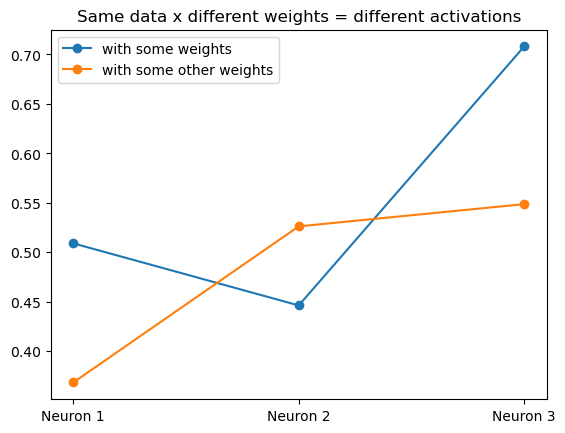

In [35]:
some_weights = np.random.randn(NUMBER_OF_NEURONS,NUMBER_OF_INPUTS)
some_other_weights = np.random.randn(NUMBER_OF_NEURONS,NUMBER_OF_INPUTS)

activation_with_some_weights = network_layer(inputs=input_vector,
                                             weights=some_weights,
                                             bias=0,
                                             activation_function=sigmoid)
activation_with_some_other_weights = network_layer(inputs=input_vector,
                                                   weights=some_other_weights,
                                                   bias=0,
                                                   activation_function=sigmoid)

plt.plot(activation_with_some_weights.T, 
         marker="o",
         label="with some weights");
plt.plot(activation_with_some_other_weights.T, 
         marker="o",
         label="with some other weights");
plt.title("Same data x different weights = different activations");
plt.xticks(ticks=[0,1,2],
           labels=["Neuron 1", "Neuron 2", "Neuron 3"]);
plt.legend();

We face two related facts:

1. An ANN's output is shaped by the weights
    - When weights change, so does the output
2. If you want a network to produce a given output, you need to change the weights

These facts create a problem: how can you change the weights towards a desired outputs?
- You do _**error driven learning**_ 

### **3.1. What is Error-Driven Learning?** <a class="anchor" id="31-what-is-error-driven-learning"></a>

Error-driven learning is a simple algorithm (i.e., a sequence of actions):

1. Feed your data into the ANN
2. Compare the output to a target (i.e., a desired output)
3. Calculate the error
3. Change the weights 
4. Repeat until the error tends to zero

### **3.2. The Rules of Error-Driven Learning** <a class="anchor" id="32-the-rules-of-error-driven-learning"></a>

In order to work, error-driven learning must obey three rules:

1. Weights must change in a way that minimises the error

2. Different weights must change differently
    - Because some contribute to the error more than others
    
3. Weights cannot change at random
    - Otherwise, learning might take forever

### **3.3. The Prerequisites for Error-Driven Learning** <a class="anchor" id="33-the-prerequisites-for-error-driven-learning"></a>

In light of its rules, error-driven learning needs:

1. An error function (a.k.a. _loss_ function)
    - To compute the distance between real and desired output

2. A [derivative](https://en.wikipedia.org/wiki/Derivative) of the error function with respect to the weights
    - To quantify the contribution of each weight to the error function  
    
3. A rule to change weights appropriately
    - Often, that's error backpropagation

### **3.4. Error Backpropagation** <a class="anchor" id="34-error-backpropagation"></a>

Error backpropagation is the most basic and most common rule to change weights. 

In error backpropagation, we subtract from each weight a small fraction of its contribution to the error: 

$$ w_i \leftarrow w_i - \alpha \frac{\delta L_{\vec{w}}}{\delta w_i} $$

where

- $ w_i = $ any given weight

- $ \alpha = $ the _learning rate_, i.e., an arbitrary coefficient between 0 and 1

- $ \displaystyle \frac{\delta L_{\vec{w}}}{\delta w_i} = $ the derivative of loss function $ L $ with respect to $ w_i $
    - That's a measure of $ w_i $'s contribution to $ L $

Note that a weight's contribution to the error $ \displaystyle \Big ( \frac{\delta L_{\vec{w}}}{\delta w_i} \Big ) $ can be positive or negative

- If it's positive, it means that the weight is increasing the error
    - We like that weight and we increase it 
- If it's negative, it means that the weight is decreasing the error
    - We don't like that weight and we decrease it 

If you can't see these facts in the mathematical formulation, you can (optionally) check out the explanation below.

#### **Optional: Proof that Error Backpropagation Changes Weights Smartly**

Consider four facts:
1. An increasing error corresponds to an increasing error function
2. A decreasing error corresponds to a decreasing error function
3. In general, the derivative of a function is:
    - Positive where the function is increasing
    - Negative where the function is decreasing

These facts imply the following:

1. Weights that increase the error function are decreased (by _subtracting_ a fraction of their contribution to the error)

    $$ \Bigg ( \frac{\delta L_{\vec{w}}}{\delta w_i} > 0 \Bigg ) \implies \Bigg [ \Bigg ( w_i \leftarrow w_i - \alpha \frac{\delta L_{\vec{w}}}{\delta w_i} \Bigg ) = \Bigg ( w_i \leftarrow w_i - \Big (+ \alpha \frac{\delta L_{\vec{w}}}{\delta w_i} \Big ) \Bigg ) = \Bigg ( w_i \leftarrow w_i - \alpha \frac{\delta L_{\vec{w}}}{\delta w_i} \Bigg ) \Bigg ]  $$ 
    
    (note: minus times plus equals minus)


2. Weights that decrease the error function are increased (by _adding_ a fraction of their contribution to the error)

    $$ \Bigg ( \frac{\delta L_{\vec{w}}}{\delta w_i} < 0 \Bigg ) \implies \Bigg ( \alpha \frac{\delta L_{\vec{w}}}{\delta w_i} = - \alpha \frac{\delta L_{\vec{w}}}{\delta w_i} \Bigg ) \implies \Bigg [ \Bigg ( w_i \leftarrow w_i - \alpha \frac{\delta L_{\vec{w}}}{\delta w_i} \Bigg ) = \Bigg ( w_i \leftarrow w_i - \Big (- \alpha \frac{\delta L_{\vec{w}}}{\delta w_i} \Big ) \Bigg ) = \Bigg ( w_i \leftarrow w_i + \alpha \frac{\delta L_{\vec{w}}}{\delta w_i} \Bigg ) \Bigg ]  $$ 

    (note: minus times minus equals plus)
    

That's it.

A very close analogy: linear regression. 

In linear regression, you have a set of data and a linear function (the regression line) whose position in the plane depends on some parameters (the slope and intercept). When those parameters are optimal, the regression line is right in the center of your cloud of data points.

In the example below, we try a number of slope values and visualize how they fit the cloud of points (the intercept is set to zero for simplicity):

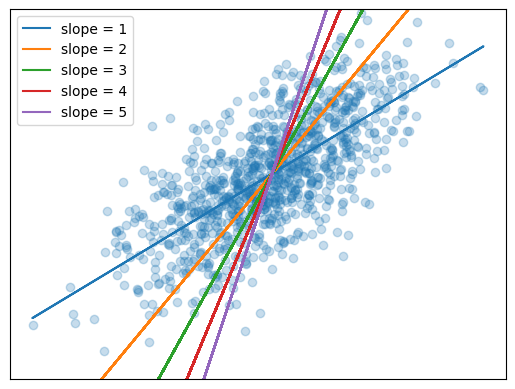

In [110]:
import math

covariate = np.random.normal(0,1,1000)
regressor = covariate + np.random.normal(0,1,1000)

plt.scatter(x=covariate,
            y=regressor,
            alpha=.25);
for slope_value in range(1,6):
    plt.plot(covariate, 0 + slope_value*covariate, label=f"slope = {slope_value}");    
plt.ylim((math.floor(min(regressor)), math.ceil(max(regressor))));
plt.xticks([])
plt.yticks([])
plt.legend();

It seems that a slope of 1 is actually quite good, while the line's position becomes increasingly suboptimal as the slope increases.

Let's rephrase this situation in ANN jargon:

- Desired output: a line that has the least possible distance from all datapoints  

- Error function: the sum of squared errors (i.e., the squared distances between points on the line and the corresponding points in the cloud)

- Real output: determined by the slope (i.e., the only weight at play)
    - We see that high slopes result in worse outputs

- If we want to minimise the distance between the real and desired output, we must decrease the slope
    - We can do that by error backpropagation
        - It would be an overkill, because we already have an [analytical solution](https://en.wikipedia.org/wiki/Ordinary_least_squares) to this problem. But we could!

[Back to top](#back-to-top)

# **Part 2: The Implementation** <a class="anchor" id="part-2-the-implementation"></a>

So far, we have seen toy examples of artificial neurons and neural network layers. 

Despite dealing with simplified scenarios, the code examples got more and more complex as we progressed through the tutorial. 
- And we didn't even code a full network, nor backpropagation!

To survive real-world scenarios, we need code that abstracts away the details and let us focus on high-level choices. 

## **Enter: PyTorch**

[PyTorch](https://pytorch.org/) is a Python library to build, train, and test deep artificial neural networks

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/c/c6/PyTorch_logo_black.svg" />
</p>

It contains classes and functions to: 

- Download and use publicly available datasets 
- Set up any kind of ANN architecture
- Train ANNs with a variety of learning algorithms
- Exploit the parallel computing capabilities of GPUs 
    - More on this later

PyTorch is fully compatible with the Python scientific computing ecosystem for  - in particular, it is well-integrated with NumPy. 

You can install it via `conda` or `pip` following the instructions on its homepage. 

But it's probably faster to get started on Colab - especially because your computer might not be powerful enough for deep learning. 

Once installed (or, once opened this notebook in Colab), you can start using PyTorch with a simple import statement:

In [ ]:
import torch

In the following, we will use PyTorch to build a CNN for image recognition.

Therefore, we will need some images to work with. 

PyTorch has a companion library that contains classes and functions to work with images. This companion library is called `torchvision`.

Among other things, `torchvision` contains a `datasets` package (i.e., a collection of `.py` files) that provides tools to download and use publicly available image datasets. 

We will use the [MNIST dataset of handwritten digits](https://en.wikipedia.org/wiki/MNIST_database), which contains $70000$ handwriting samples of the numbers from $0$ to $9$, encoded as $28$ x $28$ grids of grayscale luminosity values.  

The code below downloads MNIST from its online repository:  

In [ ]:
import torchvision
import torchvision.transforms as transforms

training_dataset = torchvision.datasets.MNIST(root='classifier data', 
                                              train=True, 
                                              download=True, 
                                              transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='classifier data', 
                                          train=False, 
                                          download=True, 
                                          transform=transforms.ToTensor())